## Visualize the Hi-C data as interaction matrix heatmaps

2.873013858756593e-06 1.994280770417844e-08


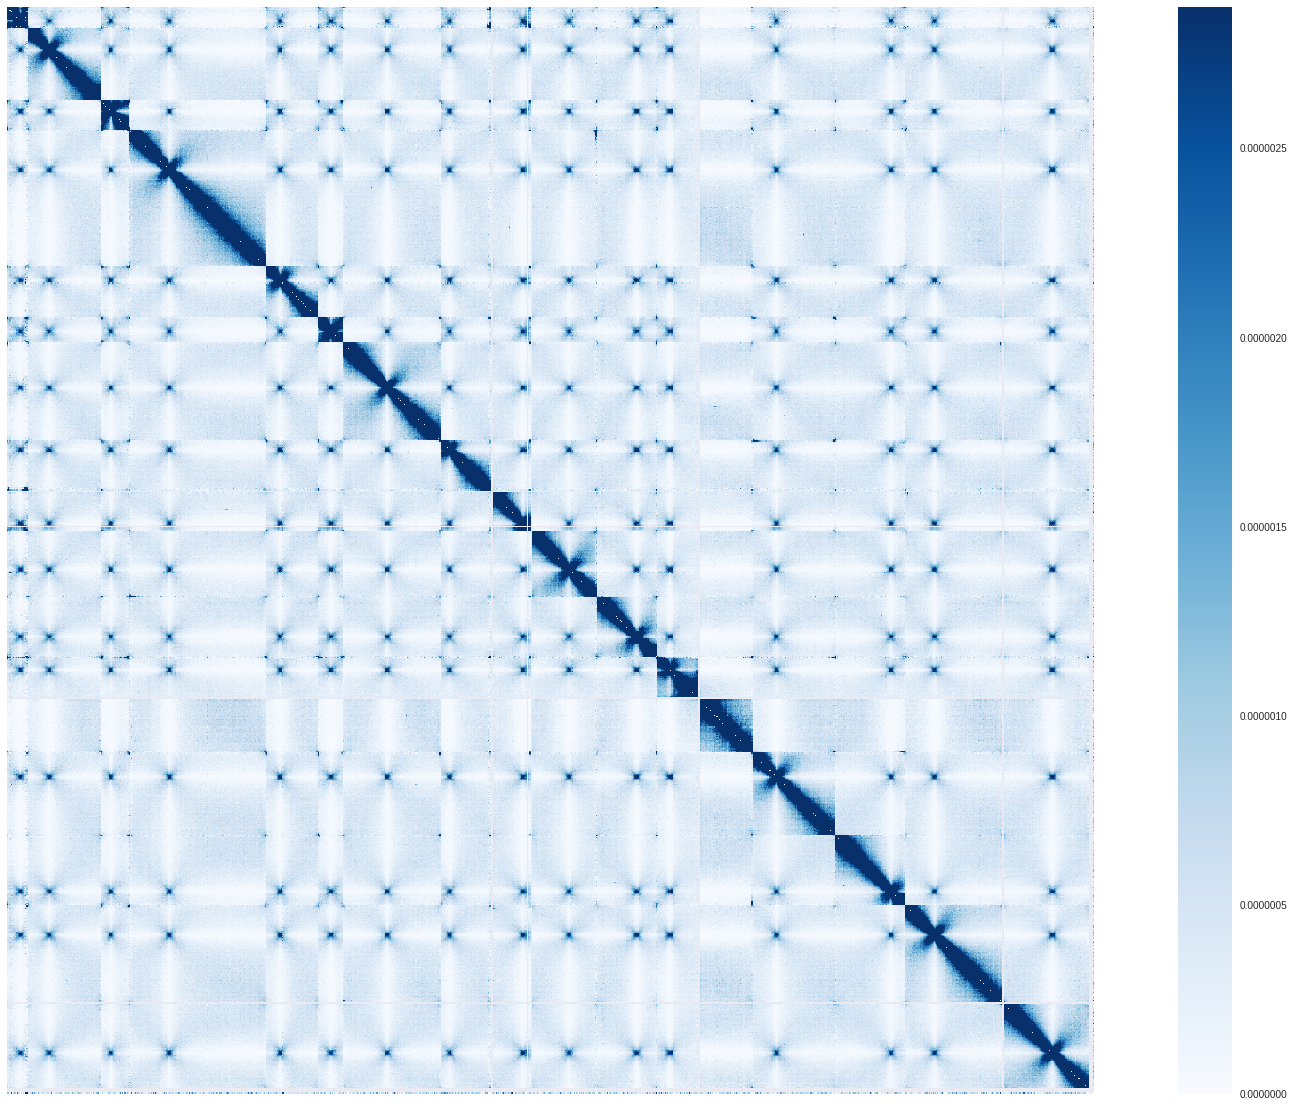

In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import simplejson as json

## Get the data
exp = pd.read_csv('/files/Data/thesis/data/fastC-exponential-R2.w303.NA.H-10000-wDiag-noSS-iced.matrix.all.all.matrix',
                 sep = '\t', skiprows = 3, index_col = 0)
exp = exp.iloc[:-10,:-10]
exp = exp/exp.sum().sum()
## Replace nans with dummy -1 temporarily
exp.replace(np.nan, -1234567890, inplace = True)
## Flatten values into a sorted list
all_vals = []
for each in exp.values.tolist():
    all_vals += each
sorted_vals = sorted(all_vals)
sorted_vals_start_ind = np.where(np.array(sorted_vals) > -1234567890)
sorted_vals = sorted_vals[sorted_vals_start_ind[0][0]:]
## Get cutoff values for lower and upper range bounds
top_val = sorted_vals[int(len(sorted_vals)*0.98)]
bot_val = sorted_vals[int(len(sorted_vals)*0.02)]
print(top_val, bot_val)
## Replace values above/below upper/lower bounds with upper/lower bound values
exp_scl = exp[exp < top_val].replace(np.nan, top_val)
## Replace dummy -1 with dummy 1234567890 temporarily
exp_scl.replace(-1234567890, 1234567890, inplace = True)
exp_scl = exp_scl[exp_scl > bot_val].replace(np.nan, bot_val)
## Replace dummies with nan
exp_scl.replace(1234567890, np.nan, inplace = True)
## Make plot
plt.figure(figsize = [30, 20])
sns.heatmap(exp_scl, cmap = 'Blues', xticklabels=False, yticklabels=False, vmin = 0, square = True)

3.8302617277670385e-06 9.163940479152286e-08


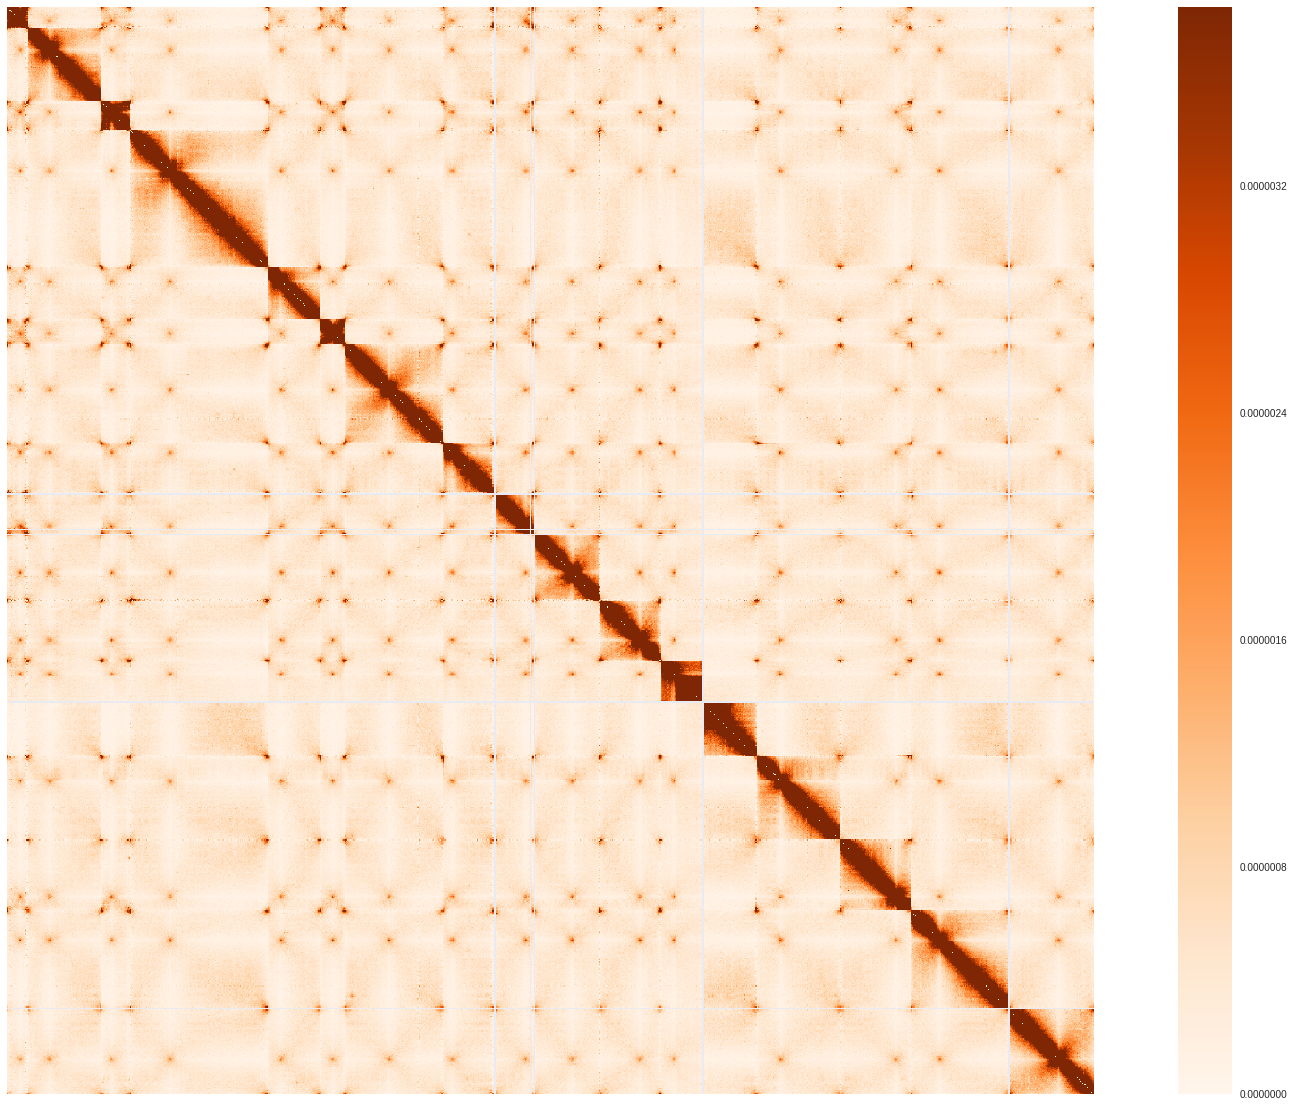

In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
## Get the data
qui = pd.read_csv('/files/Data/thesis/data/fastC-minusGlucose-R3.w303.NA.H-10000-wDiag-noSS-iced.matrix.all.all.matrix',
                 sep = '\t', skiprows = 3, index_col = 0)
qui = qui.iloc[:-10,:-10]
qui = qui/qui.sum().sum()
## Replace nans with dummy -1 temporarily
qui.replace(np.nan, -1234567890, inplace = True)
## Flatten values into a sorted list
all_vals = []
for each in qui.values.tolist():
    all_vals += each
sorted_vals = sorted(all_vals)
sorted_vals_start_ind = np.where(np.array(sorted_vals) > -1234567890)
sorted_vals = sorted_vals[sorted_vals_start_ind[0][0]:]
## Get cutoff values for lower and upper range bounds
top_val = sorted_vals[int(len(sorted_vals)*0.98)]
bot_val = sorted_vals[int(len(sorted_vals)*0.02)]
print(top_val, bot_val)
## Replace values above/below upper/lower bounds with upper/lower bound values
qui_scl = qui[qui < top_val].replace(np.nan, top_val)
## Replace dummy -1 with dummy 1234567890 temporarily
qui_scl.replace(-1234567890, 1234567890, inplace = True)
qui_scl = qui_scl[qui_scl > bot_val].replace(np.nan, bot_val)
## Replace dummies with nan
qui_scl.replace(1234567890, np.nan, inplace = True)
## Make plot
plt.figure(figsize = [30, 20])
sns.heatmap(qui_scl, cmap = 'Oranges', xticklabels=False, yticklabels=False, vmin = 0, square = True)

1.4832395586697305e-06 -9.930046278142757e-07


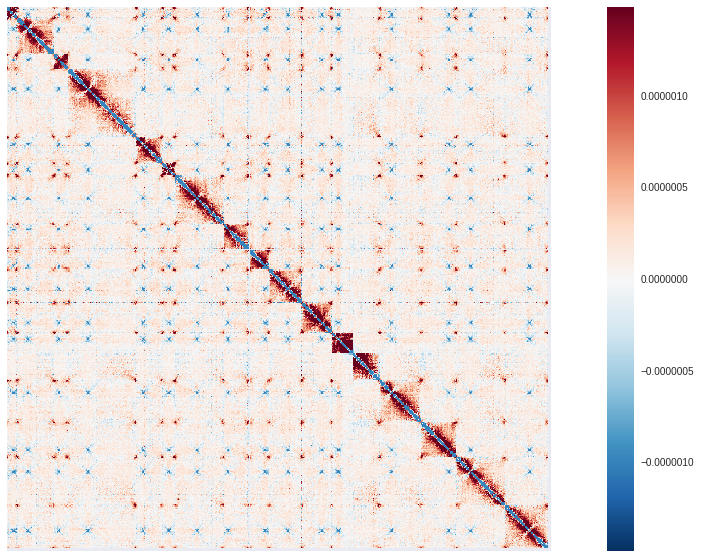

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
## Get the data

diff = qui.replace(-1234567890, np.nan) - exp.replace(-1234567890, np.nan)
## Replace nans with dummy -1 temporarily
diff.replace(np.nan, -1234567890, inplace = True)
## Flatten values into a sorted list
all_vals = []
for each in diff.values.tolist():
    all_vals += each
sorted_vals = sorted(all_vals)
sorted_vals_start_ind = np.where(np.array(sorted_vals) > -1234567890)
sorted_vals = sorted_vals[sorted_vals_start_ind[0][0]:]
## Get cutoff values for lower and upper range bounds
top_val = sorted_vals[int(len(sorted_vals)*0.99)]
bot_val = sorted_vals[int(len(sorted_vals)*0.01)]
print(top_val, bot_val)
## Replace values above/below upper/lower bounds with upper/lower bound values
diff_scl = diff[diff < top_val].replace(np.nan, top_val)
## Replace dummy -1 with dummy 1234567890 temporarily
diff_scl.replace(-1234567890, 1234567890, inplace = True)
diff_scl = diff_scl[diff_scl > bot_val].replace(np.nan, bot_val)
## Replace dummies with nan
diff_scl.replace(1234567890, np.nan, inplace = True)
## Make plot
plt.figure(figsize = [20, 10])
sns.heatmap(diff_scl[exp_scl.columns].loc[exp_scl.index], xticklabels=False, yticklabels=False, square = True)

## Convert Hi-C interaction matrix data to JSON format

In [33]:
import pandas as pd
import numpy as np

chrs = ['chrI','chrII','chrIII','chrIV','chrV','chrVI','chrVII','chrVIII',
        'chrIX','chrX','chrXI','chrXII','chrXIII','chrXIV','chrXV','chrXVI']
chr_start_bins = {'chrI': 0,'chrII': 24,'chrIII': 106,'chrIV': 138,'chrV': 292,'chrVI': 350,'chrVII': 378,'chrVIII': 488,'chrIX': 545,
                  'chrX': 589,'chrXI': 664,'chrXII': 731,'chrXIII': 839,'chrXIV': 932,'chrXV': 1011,'chrXVI': 1121}
chr_end_bins = {'chrI': 23,'chrII': 105,'chrIII': 137,'chrIV': 291,'chrIX': 588,'chrV': 349,'chrVI': 377,'chrVII': 487,'chrVIII': 544,
                'chrX': 663,'chrXI': 730,'chrXII': 838,'chrXIII': 931,'chrXIV': 1010,'chrXV': 1120,'chrXVI': 1215}

## Get the exp data
exp = pd.read_csv('/files/Data/thesis/data/fastC-exponential-R2.w303.NA.H-10000-wDiag-noSS-iced.matrix.all.all.matrix',
                 sep = '\t', skiprows = 3, index_col = 0)
exp = exp.iloc[:-10,:-10]
exp = exp/exp.sum().sum()
exp.index = range(exp.shape[0])
exp.columns = exp.index.tolist()
# with open('../data/hic_'+row_chr+'_'+col_chr+'_new.json', 'w') as f:
## Get the qui data
qui = pd.read_csv('/files/Data/thesis/data/fastC-minusGlucose-R3.w303.NA.H-10000-wDiag-noSS-iced.matrix.all.all.matrix',
                 sep = '\t', skiprows = 3, index_col = 0)
qui = qui.iloc[:-10,:-10]
qui = qui/qui.sum().sum()
qui.index = range(qui.shape[0])
qui.columns = qui.index.tolist()
## Get the diff data
diff = qui - exp
## Save data
for i in chrs:
    for j in chrs:
        exp.iloc[chr_start_bins[i]:chr_end_bins[i]+1, chr_start_bins[j]:chr_end_bins[j]+1].astype(str).to_json('../data/hic_'+
                                                                                                               i+'_'+j+
                                                                                                               '_exp.json', 
                                                                                                               orient = 'split')
        qui.iloc[chr_start_bins[i]:chr_end_bins[i]+1, chr_start_bins[j]:chr_end_bins[j]+1].astype(str).to_json('../data/hic_'+
                                                                                                               i+'_'+j+
                                                                                                               '_qui.json', 
                                                                                                               orient = 'split')
        diff.iloc[chr_start_bins[i]:chr_end_bins[i]+1, chr_start_bins[j]:chr_end_bins[j]+1].astype(str).to_json('../data/hic_'+
                                                                                                               i+'_'+j+
                                                                                                               '_diff.json', 
                                                                                                               orient = 'split')